### Kohonen 1 - Jan Krężel

Wczytanie potrzebnych bibliotek

In [17]:
%load_ext autoreload
%autoreload 0

In [1]:
import sys
sys.path.append(".")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from src.kohonen import *

#### Sześciokąt

In [214]:
data_hex = pd.read_csv('data/mio/hexagon.csv')
X_train = data_hex[['x', 'y']].values

**Gauss**

Wpierw przetestuję gaussowską funkcję wagi sąsiedztwa

In [215]:
koh = Kohonen(10, 10, 2, 1, gaussian)
koh.fit(X_train, 20)

<Axes: xlabel='x', ylabel='y'>

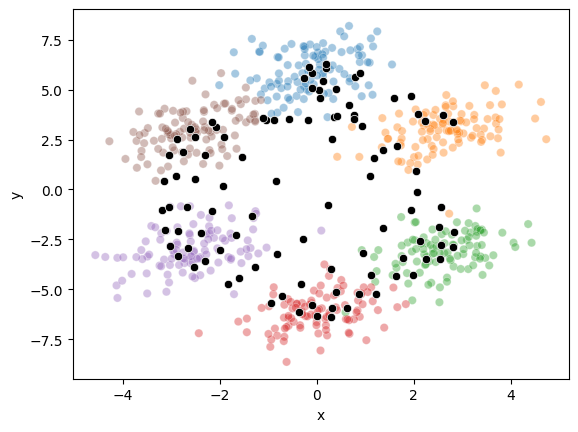

In [216]:
pos = koh.weights.reshape(koh.m*koh.n, 2)
sns.scatterplot(data=data_hex, x='x', y='y', hue='c', palette='tab10', alpha=0.4, legend=False)
sns.scatterplot(x=pos[:,0], y=pos[:,1], color='black')

Widać, że utworzone klastry pokrywają się z oryginalnymi klastrami w zbiorze danych a kształt naszej siatki przypomina sześciokąt

**Kapelusz meksykański**

Dla tego samego zbioru przetestuje także minus drugą pochodną funkcji gaussowskiej tzw. kapelusz meksykański

In [3]:
koh = Kohonen(10, 10, 2, 6, mexican_hat)
koh.fit(X_train, 20)

NameError: name 'X_train' is not defined

<Axes: xlabel='x', ylabel='y'>

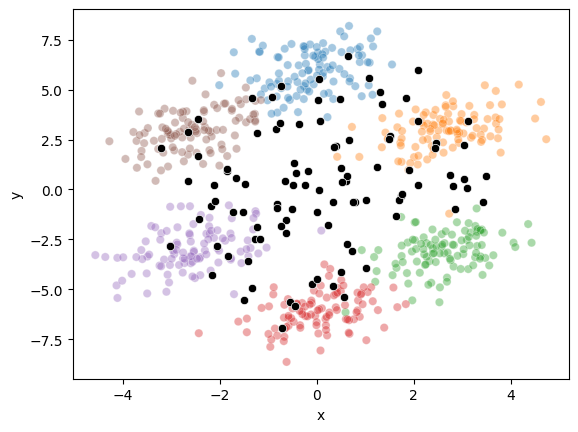

In [262]:
pos = koh.weights.reshape(koh.m*koh.n, 2)
sns.scatterplot(data=data_hex, x='x', y='y', hue='c', palette='tab10', alpha=0.4, legend=False)
sns.scatterplot(x=pos[:,0], y=pos[:,1], color='black')

Otrzymujemy *podobny* rezultat jednak z moich testów ta funkcja jest znacznie mniej stabilna. W implementacji funkcji podzieliłem wejściowe `x` przez 4, ponieważ dla oryginalnej wartości nawet bezpośredni sąsiedzi danego neuronu nie byli do niego przyciągani.

#### Sześcian

Teraz przetestuje działanie sieci na danych reprezentujących kostkę

In [3]:
data_cube = pd.read_csv('data/mio/cube.csv')
X_train = data_cube[['x', 'y', 'z']].values

In [15]:
koh = Kohonen(16, 16, 3, 8, mexican_hat)
koh.fit(X_train, 30)

Poniżej znajdują się wizualizacje danych rzutowane na płaszczyznę XY oraz YZ

<Axes: xlabel='x', ylabel='y'>

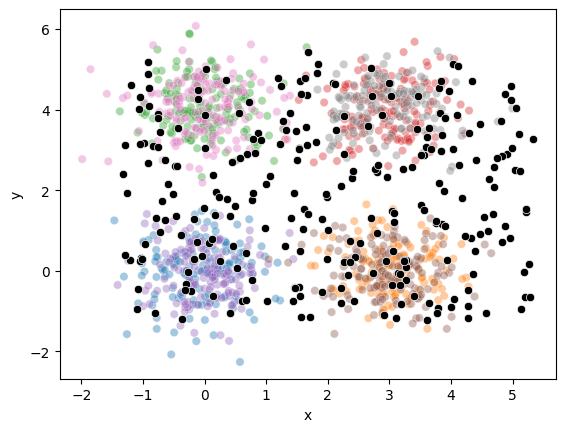

In [16]:
pos = koh.weights.reshape(koh.m*koh.n, 3)
sns.scatterplot(data=data_cube, x='x', y='y', hue='c', palette='tab10', alpha=0.4, legend=False)
sns.scatterplot(x=pos[:,0], y=pos[:,1], color='black')

<Axes: xlabel='y', ylabel='z'>

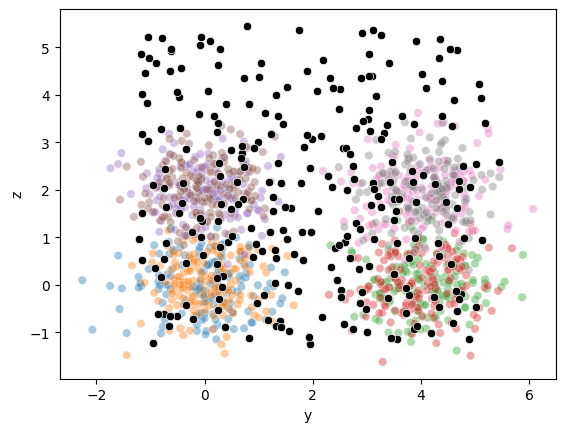

In [17]:
pos = koh.weights.reshape(koh.m*koh.n, 3)
sns.scatterplot(data=data_cube, x='y', y='z', hue='c', palette='tab10', alpha=0.4, legend=False)
sns.scatterplot(x=pos[:,1], y=pos[:,2], color='black')

Widać, że punkty znów zbierają się w odpowiadających klastrach.

Chcemy przedstawić jakoś informcje zawarte w punktach 3D na siatce naszych neuronów. W tym celu każdemu neuronowi przypiszę kolor RGB w taki sposób, że komponentowi R będzie odpowiadać jego pozycja w osi x, komponentowi G pozycja w osi y, a komponentowi B pozycja w osi z. Pozycje zostaną wpierw znormalizowane do przedziału [0,1]

In [270]:
x_min = np.min(koh.weights[:,:,0])
x_max = np.max(koh.weights[:,:,0])

y_min = np.min(koh.weights[:,:,1])
y_max = np.max(koh.weights[:,:,1])

z_min = np.min(koh.weights[:,:,2])
z_max = np.max(koh.weights[:,:,2])

colours = np.copy(koh.weights)
colours[:,:,0] = (colours[:,:,0]-x_min)/(x_max - x_min)
colours[:,:,1] = (colours[:,:,1]-y_min)/(y_max - y_min)
colours[:,:,2] = (colours[:,:,2]-z_min)/(z_max - z_min)
colours = colours.reshape((-1, 3))
pos = np.zeros(shape=(koh.m * koh.n, 2))
for i in range(koh.m):
    for j in range(koh.n):
        pos[i * koh.m + j, 0] = i
        pos[i * koh.m + j, 1] = j

<Axes: >

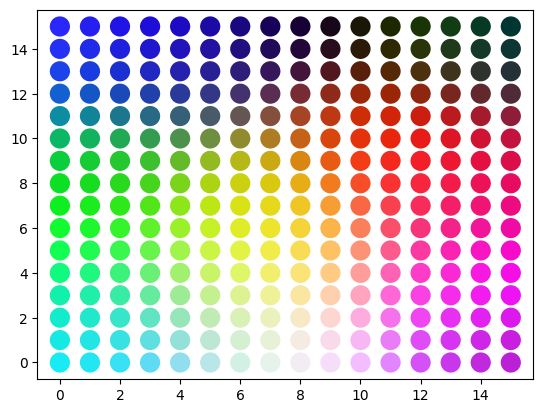

In [271]:
sns.scatterplot(x=pos[:,0],y=pos[:,1], c=colours, s=250)

Na tym obrazku bardzo dobrze widoczne jest, że sąsiadujące na siatce neurony lądują w podobnych rejonach kostki co tworzy widoczny gradient kolorów.